In [103]:
%load_ext autoreload
%autoreload 2
from wind.odecache import MultiODECache,ODECache,MultiArch
import matplotlib.pyplot as plt
%matplotlib inline
from abg_python.all_utils import *
from distinct_colours import get_distinct

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
savefig = 0
if savefig:
    plt.style.use('ABG_black_presentation')

In [93]:
thinkpad_multi_odes.readDeviceQuery()

Total glob memory: 4040
Total cuda cores: 768
Clock rate in MHz: 1291


In [157]:
ntiles =[1, 5 ,10, 15, 20, 25, 30, 40, 45, 50, 100, 200,500][:-3]

names = ['Katz96_neqntile.%d_nsystemtile.%d_fixed.%d_abs.%s_rel.%s'%(
    ntile,20,1,'5e3','5e3') 
         for ntile in ntiles]
quest_multi_odes = MultiODECache('K40m',names,'../../quest_data')
thinkpad_multi_odes = MultiODECache('GTX 1050 Ti',names,'../../thinkpad_data')
bw_multi_odes = MultiODECache('BW: K20x',names,'../../bw_data')

multi_arch = MultiArch([bw_multi_odes,quest_multi_odes,thinkpad_multi_odes])

../../quest_data/Katz96_neqntile.1_nsystemtile.20_fixed.1_abs.5e3_rel.5e3
../../quest_data/Katz96_neqntile.5_nsystemtile.20_fixed.1_abs.5e3_rel.5e3
../../quest_data/Katz96_neqntile.10_nsystemtile.20_fixed.1_abs.5e3_rel.5e3
../../quest_data/Katz96_neqntile.15_nsystemtile.20_fixed.1_abs.5e3_rel.5e3


/Users/agurvich/anaconda/envs/ytdev/lib/python3.6/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


../../quest_data/Katz96_neqntile.20_nsystemtile.20_fixed.1_abs.5e3_rel.5e3
../../quest_data/Katz96_neqntile.25_nsystemtile.20_fixed.1_abs.5e3_rel.5e3
../../quest_data/Katz96_neqntile.30_nsystemtile.20_fixed.1_abs.5e3_rel.5e3
../../quest_data/Katz96_neqntile.40_nsystemtile.20_fixed.1_abs.5e3_rel.5e3
../../quest_data/Katz96_neqntile.45_nsystemtile.20_fixed.1_abs.5e3_rel.5e3
../../quest_data/Katz96_neqntile.50_nsystemtile.20_fixed.1_abs.5e3_rel.5e3
../../thinkpad_data/Katz96_neqntile.1_nsystemtile.20_fixed.1_abs.5e3_rel.5e3
../../thinkpad_data/Katz96_neqntile.5_nsystemtile.20_fixed.1_abs.5e3_rel.5e3
../../thinkpad_data/Katz96_neqntile.10_nsystemtile.20_fixed.1_abs.5e3_rel.5e3
../../thinkpad_data/Katz96_neqntile.15_nsystemtile.20_fixed.1_abs.5e3_rel.5e3
../../thinkpad_data/Katz96_neqntile.20_nsystemtile.20_fixed.1_abs.5e3_rel.5e3
../../thinkpad_data/Katz96_neqntile.25_nsystemtile.20_fixed.1_abs.5e3_rel.5e3
../../thinkpad_data/Katz96_neqntile.30_nsystemtile.20_fixed.1_abs.5e3_rel.5e3
../../

## Plot Memory Usage vs. Time

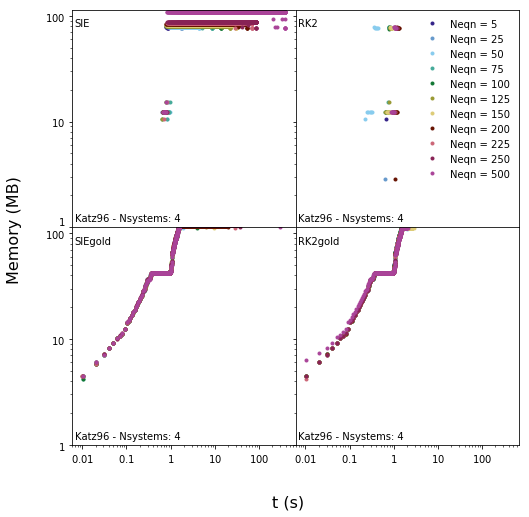

In [188]:
multi_odes.plot_memory_usages(
    label_fn=lambda x: "Neqn = %d"%x.Nequations_per_system)

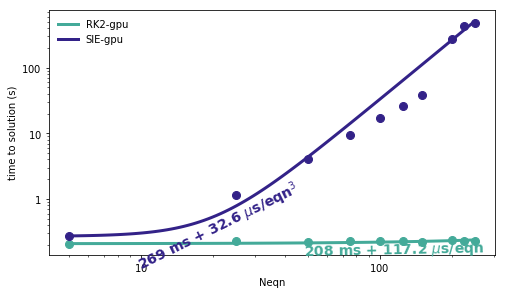

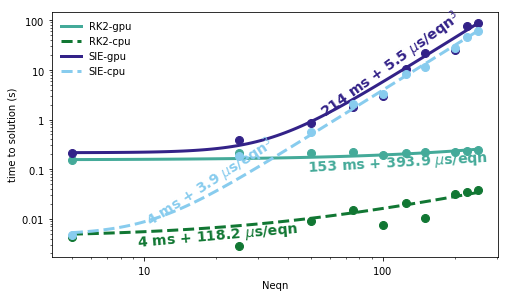

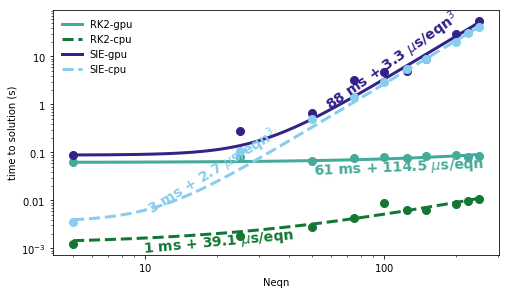

In [165]:
for arch in multi_arch:
    fig,ax = arch.plot_tts_vs_xs(
        x_function=lambda x: x.Nequations_per_system,
        xname='Neqn',
        yname='time to solution (s)',
        eqn_legend=False,
        slopes = [1,1,3,3],
        pos_rels = [0.8,.35,0.8,.35],
        vas = ['top','top','bottom','bottom'])

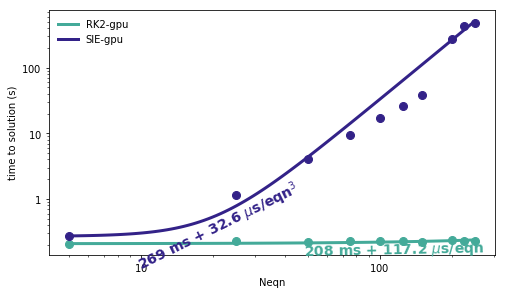

In [164]:
fig,ax = multi_arch[0].plot_tts_vs_xs(
        x_function=lambda x: x.Nequations_per_system,
        xname='Neqn',
        yname='time to solution (s)',
        eqn_legend=False,
        slopes = [1,1,3,3],
        pos_rels = [0.8,.35,0.8,.35],
        vas = ['top','top','bottom','bottom'])

In [166]:
bw_multi_odes.best_tts

{'RK2': (0.2083268165588379,
  0.00011722202294858763,
  1,
  '208 ms + 117.2 $\\mu$s/eqn'),
 'RK2gold': (nan, nan, 1, ''),
 'SIE': (0.269397497177124,
  3.2602496747369e-05,
  3,
  '269 ms + 32.6 $\\mu$s/eqn$^3$'),
 'SIEgold': (nan, nan, 3, '')}

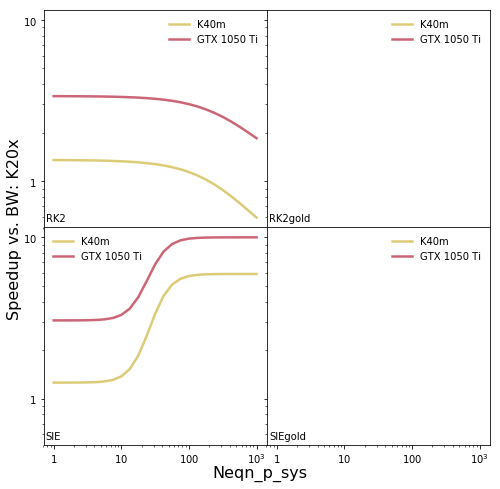

In [171]:
multi_arch.plot_scaling(
    xname='Neqn',yname='tts')
plt.gcf().set_facecolor('white')

In [10]:
for ode_cache in quest_multi_odes.ode_caches:
    try:
        ode_cache.walltimess['SIEgold']
    except:
        print(ode_cache)

ODECache Katz96_neqntile.500_nsystemtile.20_fixed.1_abs.5e3_rel.5e3 - RK2 - SIE


In [6]:
fig,ax = multi_odes.plot_tts_vs_xs(
    x_function=lambda x: x.Nequations_per_system,
    y_function=lambda x,solver: np.max(x.memory_usages[solver]),
    xname='Neqn',
    yname='Peak Memory (MB)',
    eqn_legend=False,
    pos_rels = [0,0,.0,0],
    units = 'MB',
    slopes = [2,1,2,1],
    vas = ['bottom','top','bottom','top'])
ax.set_ylim(30,1000)

NameError: name 'multi_odes' is not defined

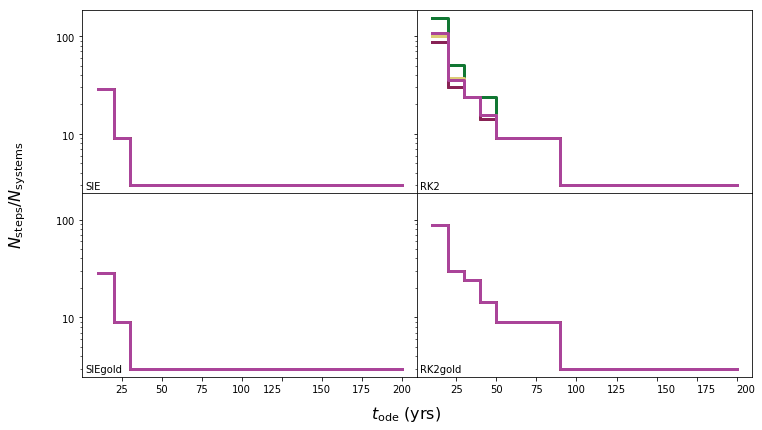

In [196]:
fig,axs = multi_odes.plot_all_nsteps_histogram()

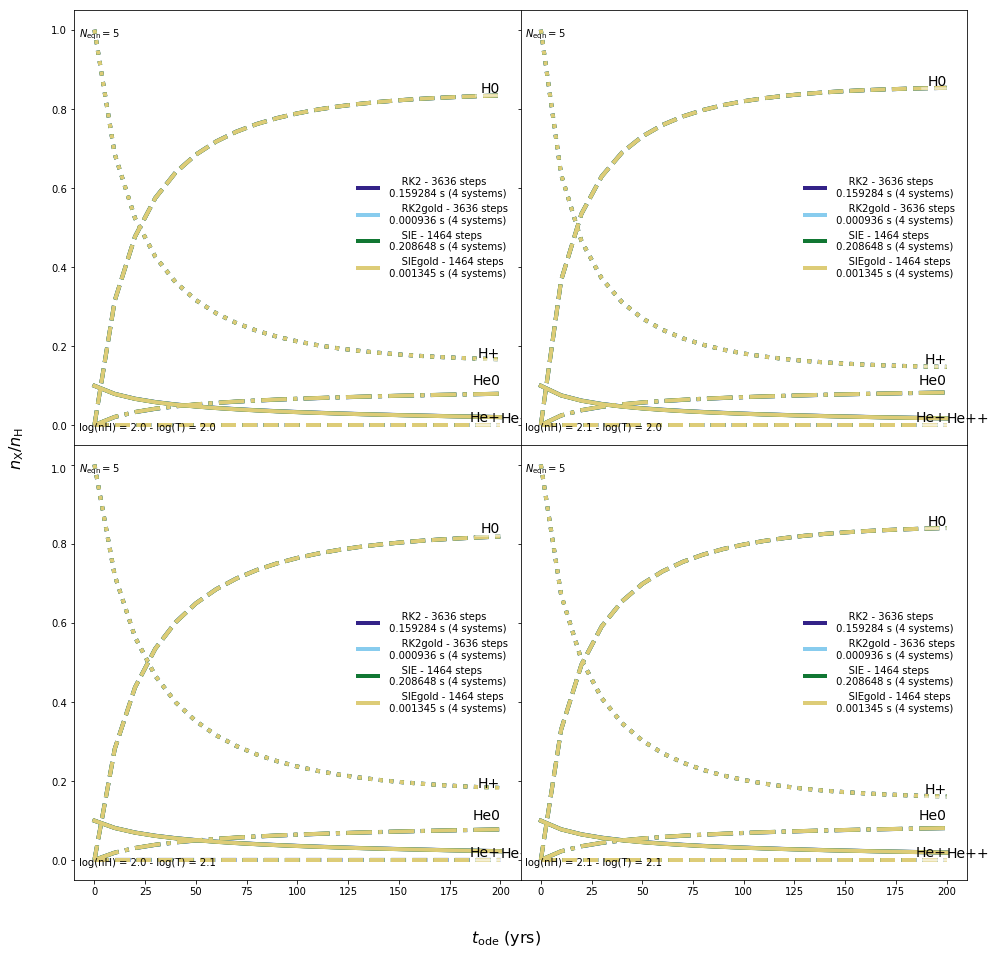

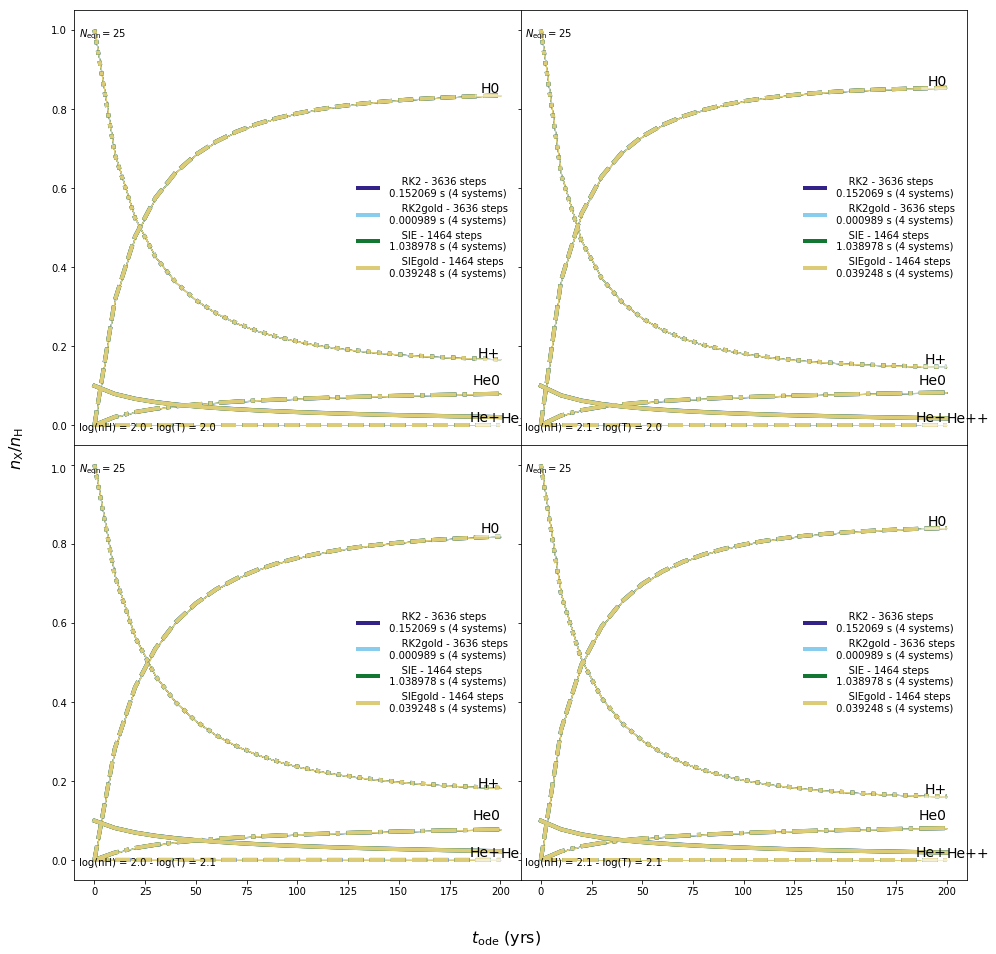

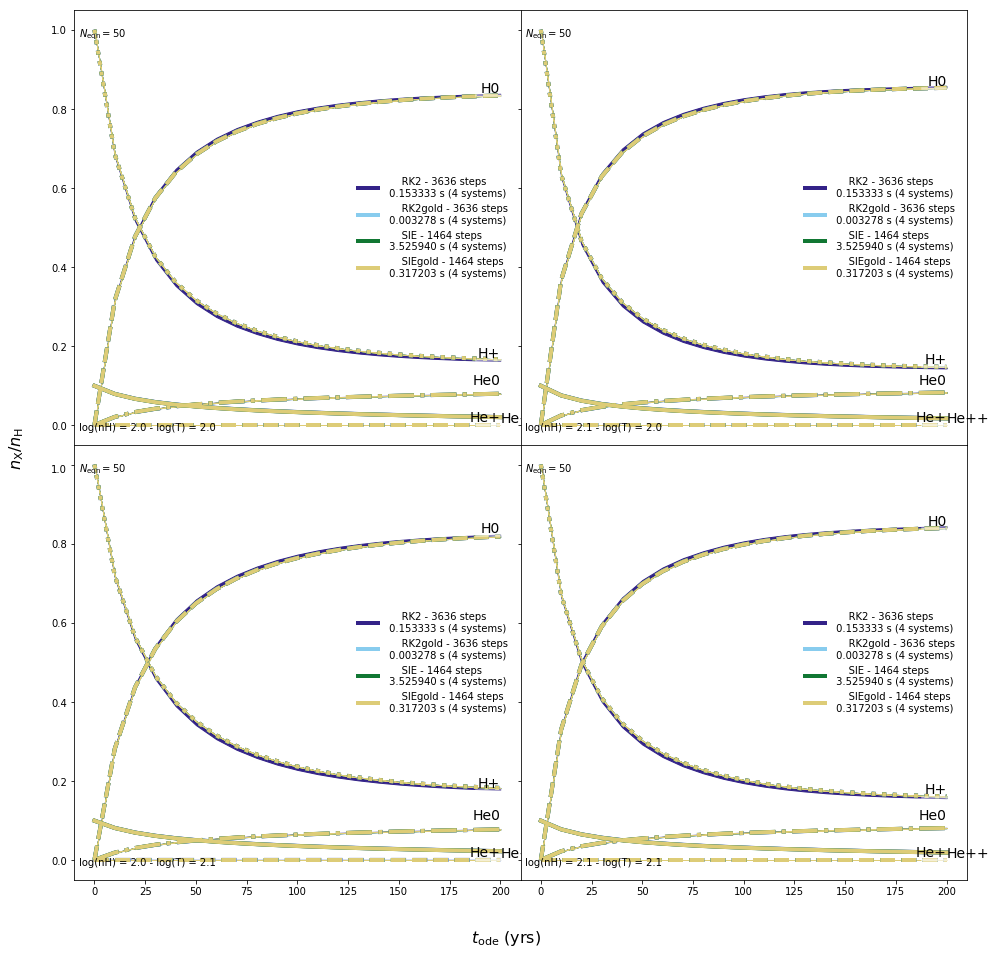

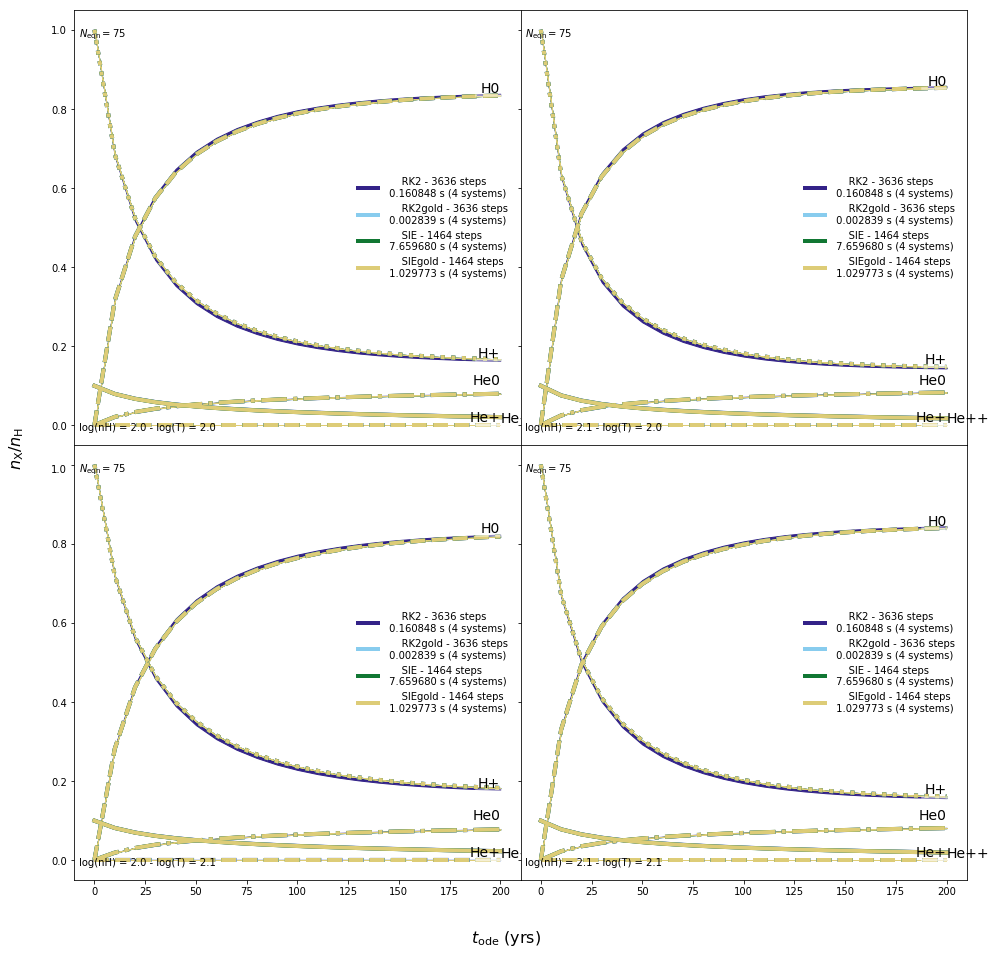

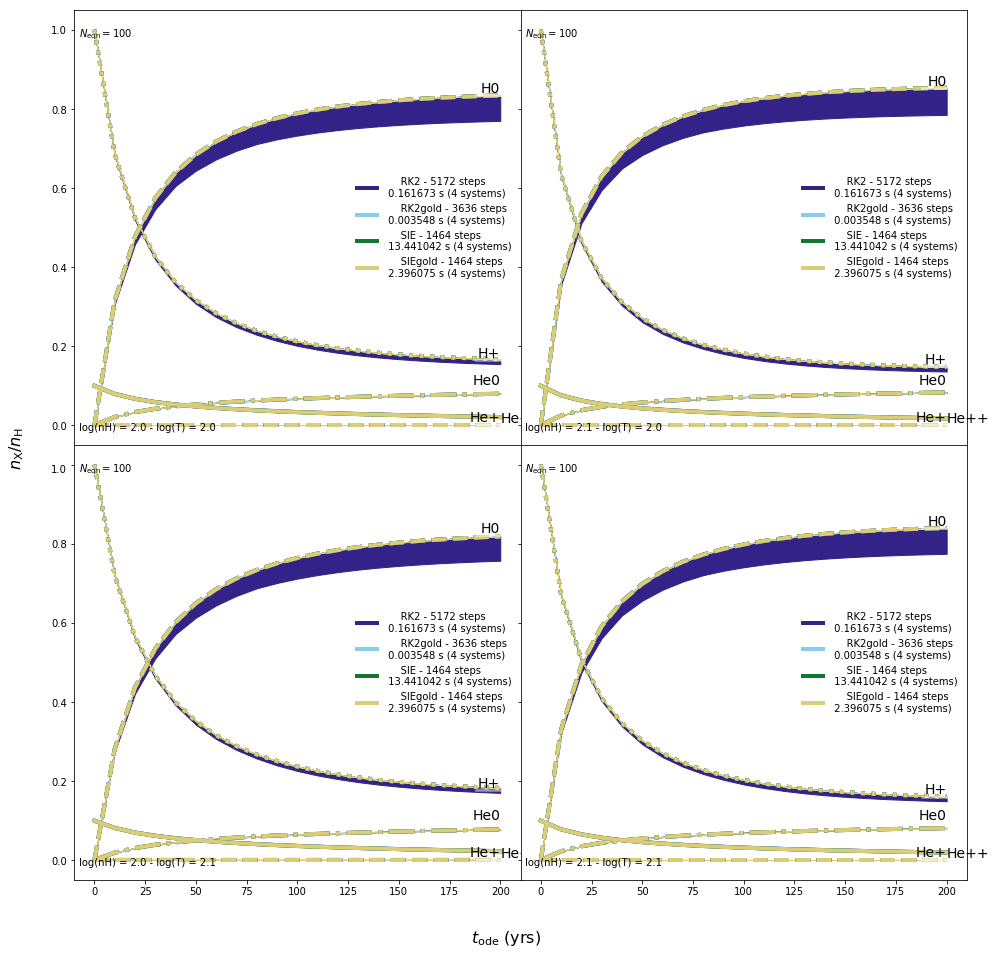

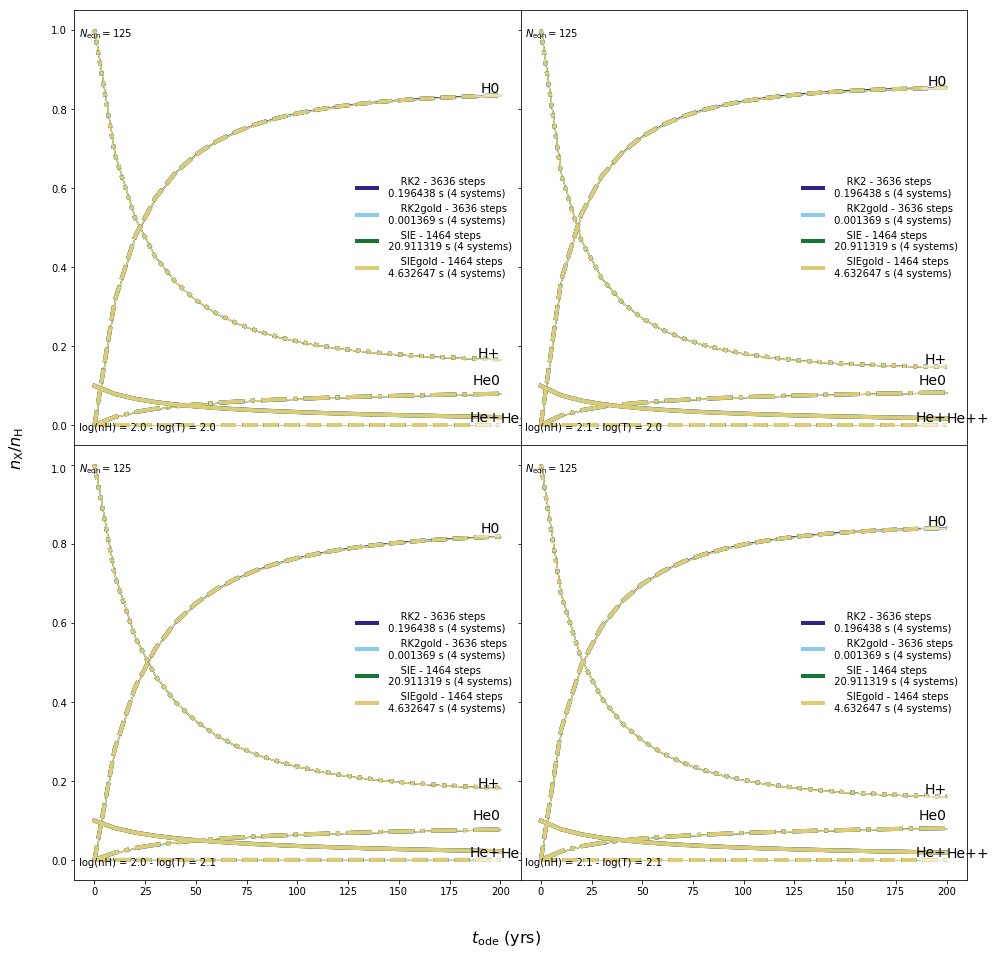

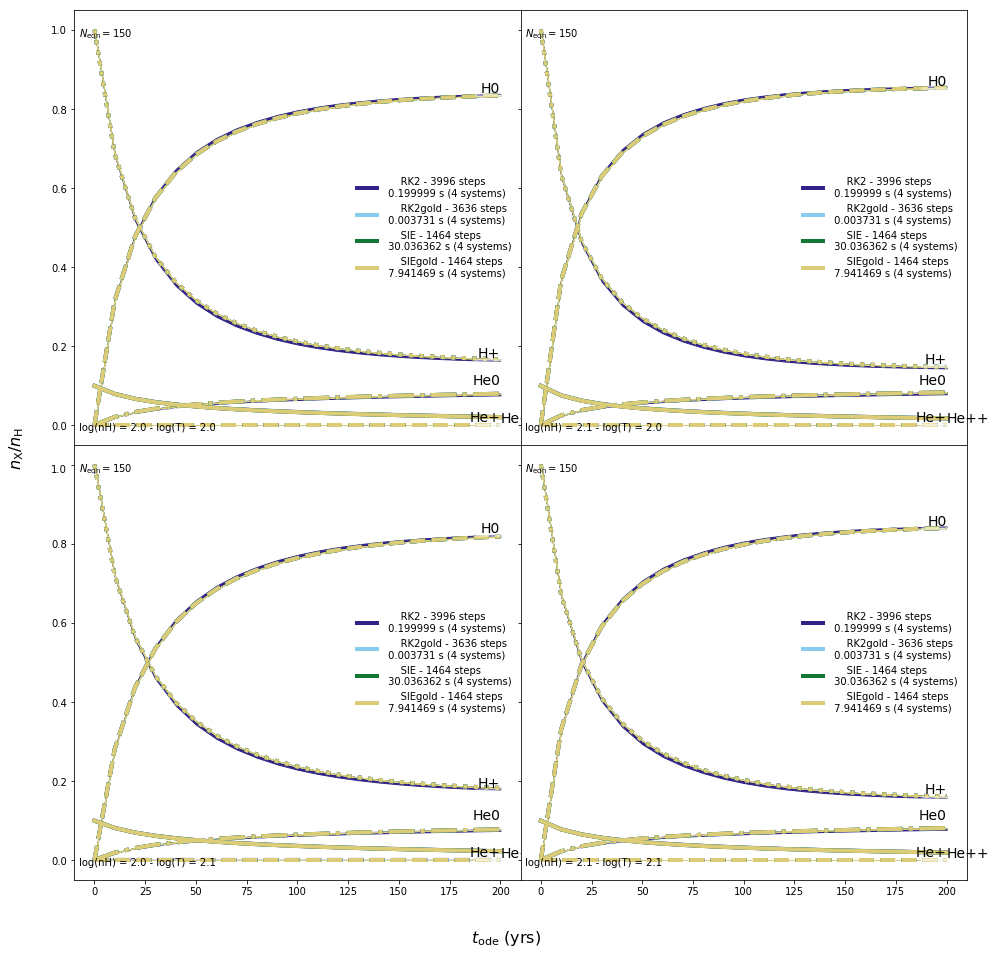

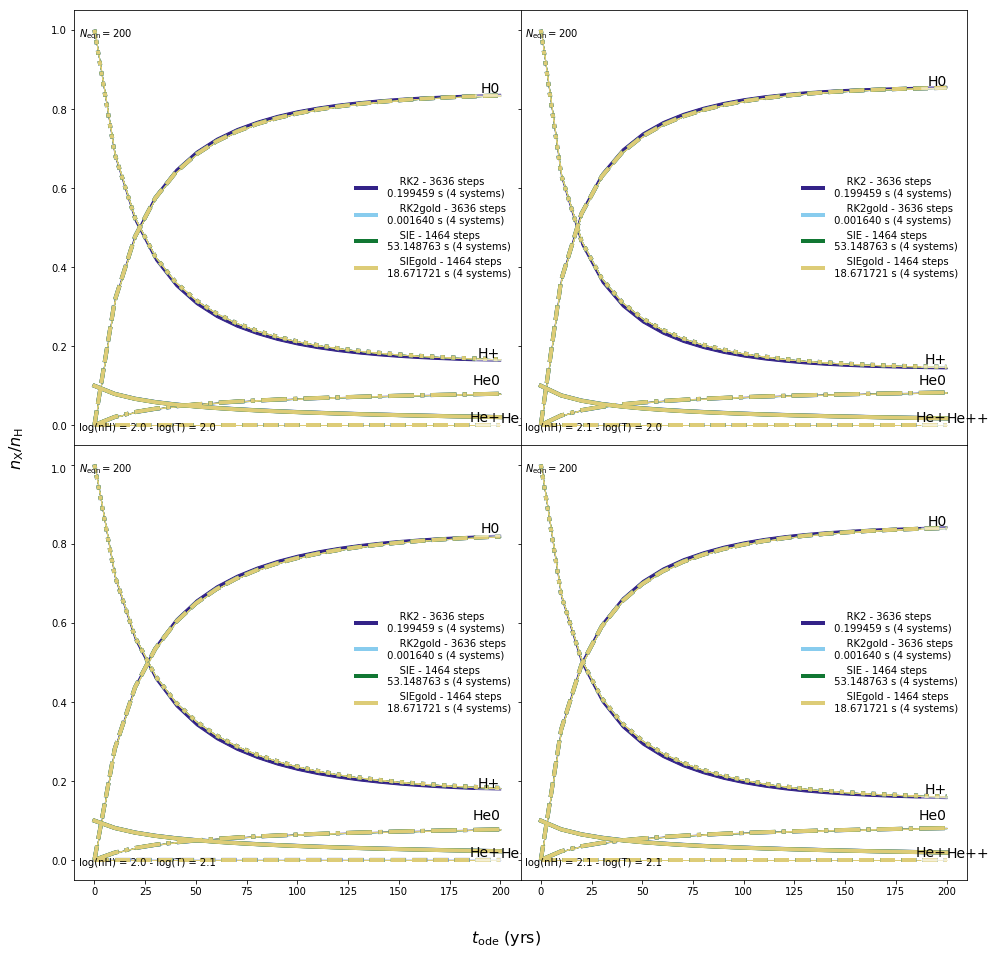

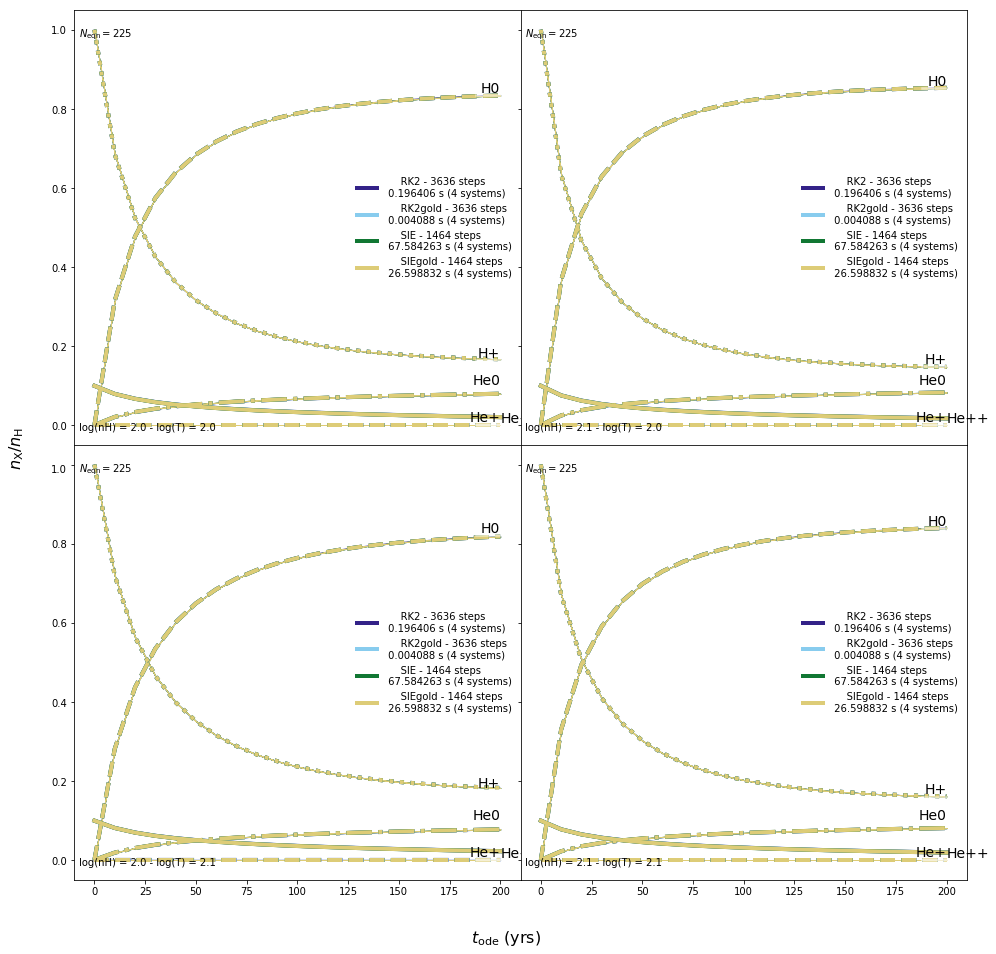

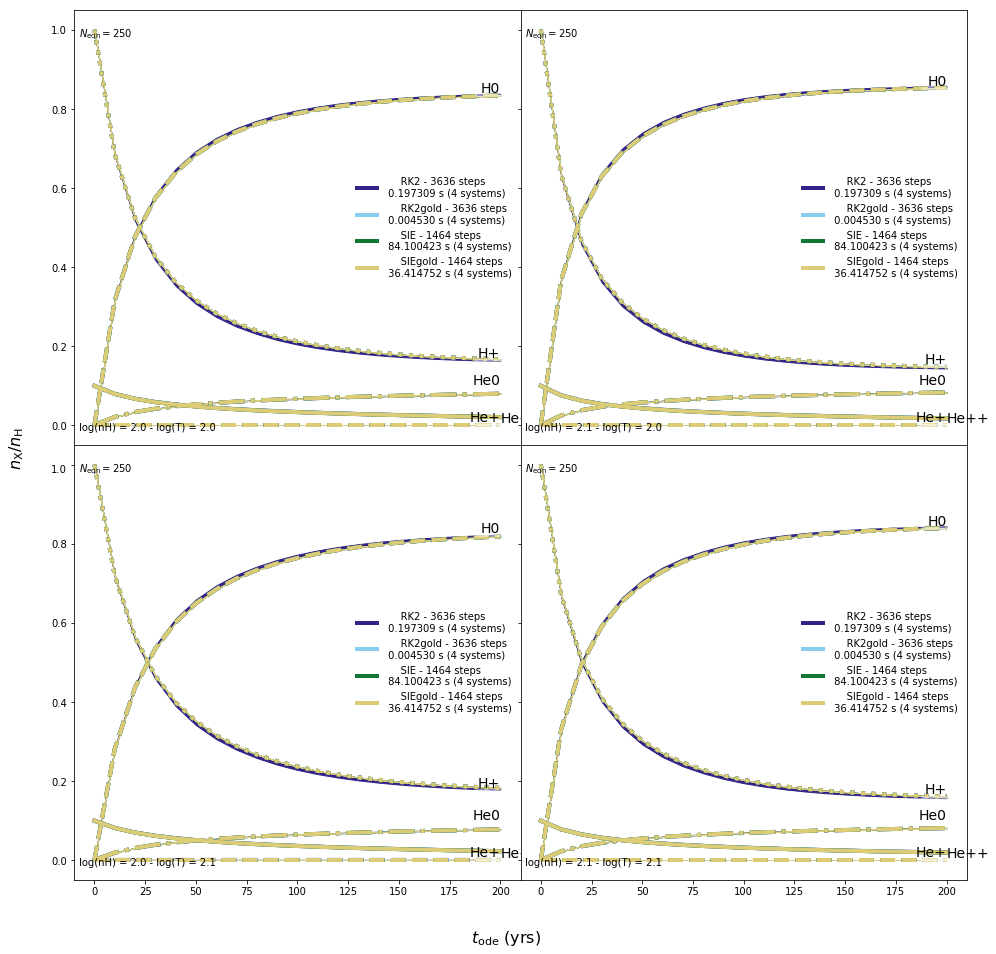

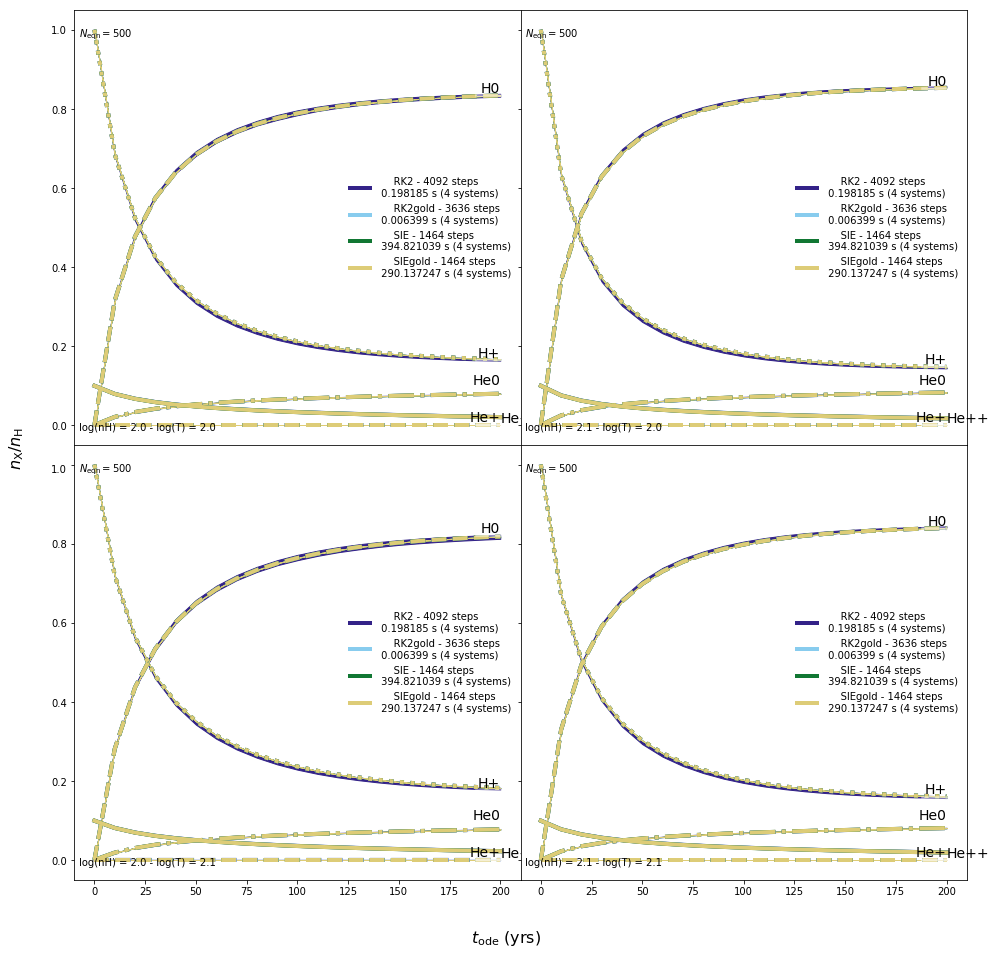

In [198]:
for frame_num,ode_cache in enumerate(multi_odes.ode_caches[:]):
    fig,axs = ode_cache.plot_all_systems(
    xname = r'$t_\mathrm{ode}$ (yrs)',
    yname = r'$n_\mathrm{X}/n_\mathrm{H}$',
    supertitle = r"$N_\mathrm{eqn}=%d$"%ode_cache.Nequations_per_system,
    plot_eqm=True,
    loc=0)
    axs = np.array(axs)
    if len(axs)>1:
        bufferAxesLabels(axs,2,2,
            ylabels=True,share_ylabel=r'$n_\mathrm{X}/n_\mathrm{H}$',
            xlabels=True,share_xlabel=r'$t_\mathrm{ode}$ (yrs)',
            label_offset=0.075)
        plt.subplots_adjust(hspace=0,wspace=0)
        fig.set_size_inches(16,16)
    for ax in axs[1::2]:
        ax.set_yticklabels([])
    if savefig:
        fig.savefig(
            "%s_system_grid_frame_%02d.png"%(multi_odes.system_name,frame_num),
            facecolor='k')
if savefig:
    frame_num+=1
    fig.savefig(
        "%s_system_grid_frame_%02d.png"%(multi_odes.system_name,frame_num),
        facecolor='k')
    frame_num+=1
    fig.savefig(
        "%s_system_grid_frame_%02d.png"%(multi_odes.system_name,frame_num),
        facecolor='k')

print()